In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', 500)
raw = pd.read_csv("../data/MULTI_socio_demo_9_raw.csv")

In [3]:
raw.head()

,essround,idno,cntry,prtvede1,prtvtdfr,prtvtfhu,prtvtcit,prtvtdpl,agea,domicil,eduyrs,mainact,hincsrca,hinctnta,hincfel,iincsrc,Unnamed: 16
0,9,17,AT,NaN,NaN,NaN,NaN,NaN,43,4,12,66,1,3,3,66,NaN
1,9,31,AT,NaN,NaN,NaN,NaN,NaN,85,4,8,66,4,2,1,66,NaN
2,9,58,AT,NaN,NaN,NaN,NaN,NaN,31,3,11,66,1,8,2,1,NaN
3,9,69,AT,NaN,NaN,NaN,NaN,NaN,49,4,12,66,1,88,2,66,NaN
4,9,98,AT,NaN,NaN,NaN,NaN,NaN,67,4,12,66,4,5,2,4,NaN


In [4]:
countries = ["DE","FR","IT","HU","PL"]

In [5]:
raw2 = raw[raw["cntry"].isin(countries)].drop(columns='Unnamed: 16')

In [6]:
cols = {'essround':'round',
        'cntry':'country',
        'agea':'age',
        'domicil':'urban',
        'eduyrs':'education(yy)',
        'mainact':'activity', 
        'hincsrca':'source_inc_h',
        'hinctnta':'income',
        'hincfel':'satisfaction_inc',
        'iincsrc':'source_inc_p',
        'prtvede1':'party_de',
        'prtvtdfr':'party_fr', 
        'prtvtfhu':'party_hu',
        'prtvtcit':'party_it',
        'prtvtdpl':'party_pl'}

In [7]:
multi = raw2.rename(columns=cols).reset_index(drop=True)

In [8]:
multi[['party_de','party_fr','party_it','party_hu','party_pl']] = multi[['party_de','party_fr','party_it','party_hu','party_pl']].fillna(value=0)

In [9]:
multi[['party_de','party_fr','party_it','party_hu','party_pl']] = multi[['party_de','party_fr','party_it','party_hu','party_pl']].astype(int)

### We want to analyse the socio-economic profile of far-right voters. We start by slicing our data frame into subsets for each country

#### DE

In [10]:
de_sode = multi[multi['country']== 'DE']

In [24]:
de_f = de_sode[de_sode["party_de"] == 6].drop(columns=['party_fr',
                                                       'party_it',
                                                       'party_pl',
                                                       'party_hu']).reset_index(drop=True)

In [44]:
de_f.describe()

,round,idno,party_de,age,urban,education(yy),activity,source_inc_h,income,satisfaction_inc,source_inc_p
count,96.0,96.000000,96.0,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,9.0,24836.093750,6.0,54.260417,3.041667,13.468750,44.447917,2.072917,9.250000,1.906250,16.218750
std,0.0,14189.035905,0.0,15.159673,1.014803,2.483432,29.980299,1.445463,16.198765,0.740954,26.521175
min,9.0,239.000000,6.0,19.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.0,14038.250000,6.0,43.000000,3.000000,12.000000,6.000000,1.000000,3.750000,1.000000,1.000000
50%,9.0,25177.000000,6.0,55.500000,3.000000,13.000000,66.000000,1.000000,6.000000,2.000000,3.000000
75%,9.0,37397.000000,6.0,66.000000,4.000000,15.000000,66.000000,4.000000,8.000000,2.000000,4.000000
max,9.0,48365.000000,6.0,81.000000,5.000000,21.000000,66.000000,6.000000,77.000000,4.000000,66.000000


#### FR

In [11]:
fr_sode = multi[multi['country']== 'FR']

In [26]:
fr_f = fr_sode[fr_sode["party_fr"] == 11].drop(columns=['party_de',
                                                        'party_it',
                                                        'party_hu',
                                                        'party_pl']).reset_index(drop=True)



#### IT

In [12]:
it_sode = multi[multi['country']== 'IT']

In [29]:
it_f = it_sode[it_sode["party_it"] == 9].drop(columns=['party_de',
                                                        'party_fr',
                                                        'party_hu',
                                                        'party_pl']).reset_index(drop=True)

#### PL

In [13]:
pl_sode = multi[multi['country']== 'PL']

In [32]:
pl_f = pl_sode[pl_sode["party_pl"] == 6].drop(columns=['party_de',
                                                        'party_fr',
                                                        'party_hu',
                                                        'party_it']).reset_index(drop=True)

#### HU

In [14]:
hu_sode = multi[multi['country']== 'HU']

In [34]:
hu_f = hu_sode[hu_sode["party_hu"] == 3].drop(columns=['party_de',
                                                        'party_fr',
                                                        'party_pl',
                                                        'party_it']).reset_index(drop=True)

### Age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a125f50>]],
      dtype=object)

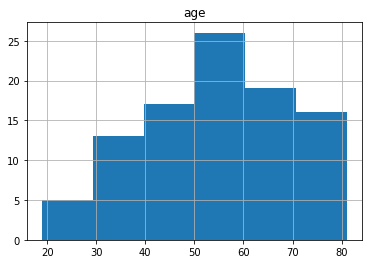

In [39]:
de_f.hist(column='age', bins=6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a1f5d90>]],
      dtype=object)

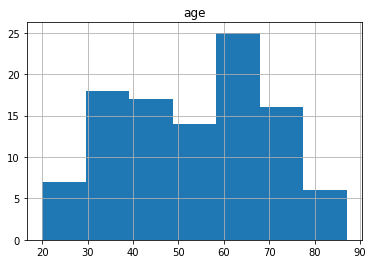

In [40]:
fr_f.hist(column='age', bins=7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a117cd0>]],
      dtype=object)

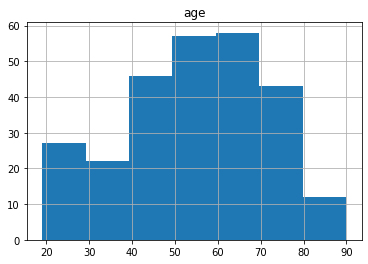

In [41]:
it_f.hist(column='age', bins=7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a345190>]],
      dtype=object)

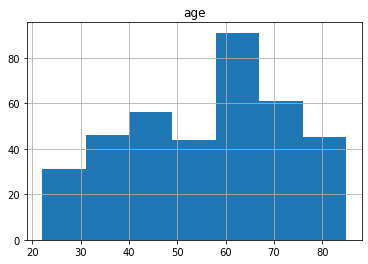

In [42]:
pl_f.hist(column='age', bins=7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a4f2150>]],
      dtype=object)

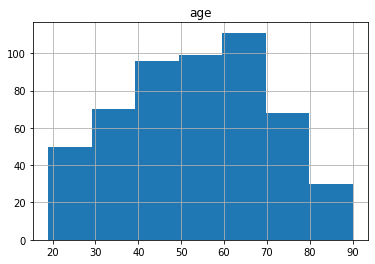

In [43]:
hu_f.hist(column='age', bins=7)

### Urban --> 1:A big city , 2:Suburbs or outskirts of a big city, 3:Town or small city, 4:Country village, 5:Farm or home in countryside

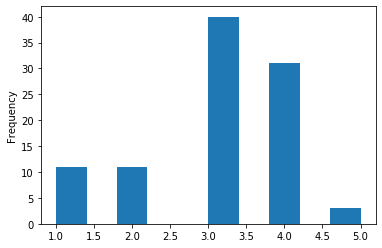

In [51]:
de_f['urban'].plot(kind='hist')

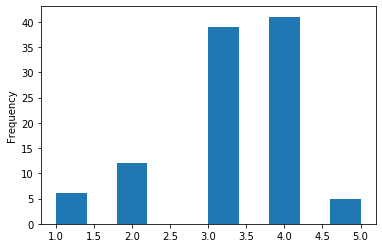

In [52]:
fr_f['urban'].plot(kind='hist')

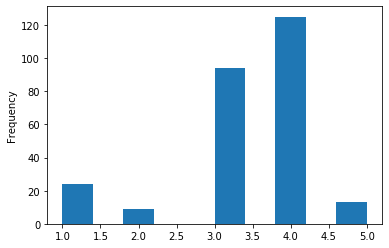

In [53]:
it_f['urban'].plot(kind='hist')

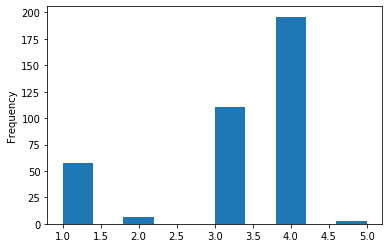

In [54]:
pl_f['urban'].plot(kind='hist')

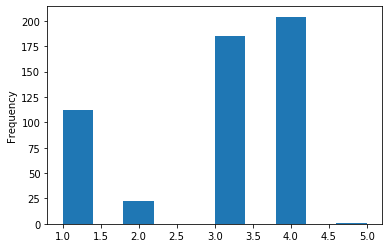

In [55]:
hu_f['urban'].plot(kind='hist')

### Years of full-time education completed

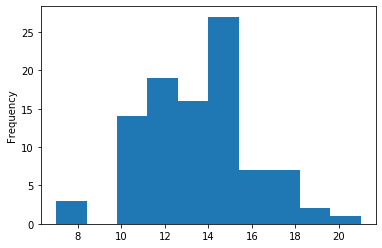

In [58]:
de_f['education(yy)'].plot(kind='hist')

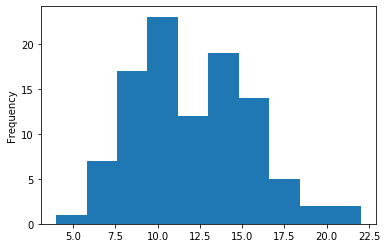

In [89]:
fr_ed = fr_f[~fr_f['education(yy)'].isin([66,77,88,99])]
fr_ed['education(yy)'].plot(kind='hist')

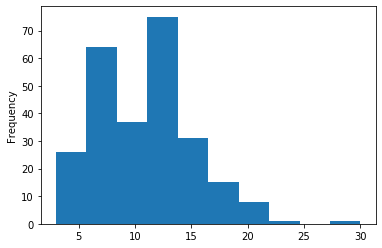

In [90]:
it_ed = it_f[~it_f['education(yy)'].isin([66,77,88,99])]
it_ed['education(yy)'].plot(kind='hist')

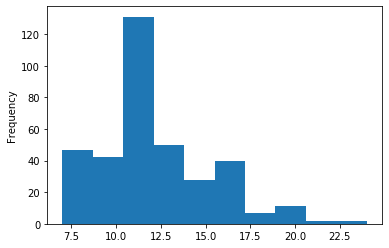

In [91]:
pl_ed = pl_f[~pl_f['education(yy)'].isin([66,77,88,99])]
pl_ed['education(yy)'].plot(kind='hist')

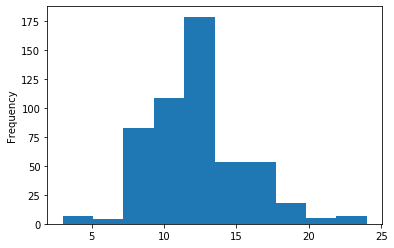

In [92]:
hu_ed = hu_f[~hu_f['education(yy)'].isin([66,77,88,99])]
hu_ed['education(yy)'].plot(kind='hist')

### Main activitiy in the last 7 days --> 1:Paid work, 2:Education, 3:Unemployed(looking for job), 4:Unemployed(not looking for job), 5:Permanently sick or disabled, 6:Retired, 7:Community or military service, 8: Housework, 9:Other

In [85]:
de_ac = de_f[~de_f['activity'].isin([66,77,88,99])]

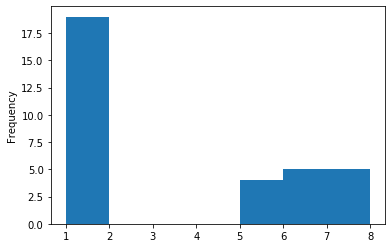

In [88]:
de_ac['activity'].plot(kind='hist', bins=7)
#Most people (63/96) replied: not applicable